# Project "Research of patterns that determine the success of computer games"

# Project Description
We work in the online store "Streamchik", which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. 
We need to identify patterns that determine the success of the game. 
This will allow you to bet on a potentially popular product and plan advertising campaigns. 
We have data up to 2016. Let's imagine that it's December 2016, and we are planning a campaign for 2017. 
Data for 2016 may be incomplete.

# Data description
- Name — name of the game
- Platform — platform
- Year_of_Release — year of release
- Genre — genre of the game
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — critics' rating (maximum 100)
- User_Score — user rating (maximum 10)
- Rating — rating from the ESRB organization (Eng. Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

## Work plan:
1. Open the data file and study the general information
2. We will perform data preprocessing, try to fill in the gaps, check the data for the presence of explicit and implicit duplicates, change the data type if necessary.
3. We will conduct a research analysis of the data, study the following information:
Let's check how many games were released in different years;
Let's check how sales by platforms have changed and try to determine the period for which new platforms appear and old ones disappear;
Let's try to determine the current data period;
Let's find out which platforms are leading in sales and choose several potentially profitable platforms;
Let's build a "box with a mustache" chart for global game sales by platform;
Let's check how the reviews of users and critics affect sales within one popular platform;
Let's analyze the overall distribution of games by genre, try to identify genres with high and low sales.
4. We will make a portrait of the user of each region:
For each region we will determine the most popular platforms (top 5);
For each region, we will determine the most popular genres (top 5);
Let's check whether the ESRB rating affects sales in a particular region.
5. Let's test two hypotheses:
The average user ratings of the Xbox One and PC platforms are the same;
The average user ratings of the Action and Sports genres are different.
6. We will write a conclusion about the information received during the study.

## Let's open the file and study the general information

In [1]:
# Importing the libraries that we will need in this project
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Let's read the data from the csv file into a dataframe and save it to a variable
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')



In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Conclusion: we opened the file and looked at the general information about it. So far, the data type in the User_Score and Year_of_Release columns is confusing.

## Let's perform data preprocessing

In [5]:
# We will reduce the column names to lowercase
games.columns = games.columns.str.lower()

In [6]:
# Let's check that the change went through correctly
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
# Changing the data type in the year_of_release column
games['year_of_release'] = np.floor(pd.to_numeric(games['year_of_release'], errors='coerce')).astype('Int64')

In [8]:
# Let's check how many gaps there are in our table
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
# Let's calculate the share of gaps
pd.DataFrame(games.isna().mean()*100).style.background_gradient('coolwarm')

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


**We see that we have gaps in the columns name, year_of_release, genre, critic_score, user_score, rating.
The largest number of omissions in the columns critic_score, user_score, rating.
Due to their large number, we cannot delete them, since in this case we will lose most of the data.
At the same time, we cannot restore them either, since we do not know the criteria for evaluating critics, users, the ESRB association and the release dates of specific games.
Therefore, we decide to leave gaps in the columns year_of_release, genre, critic_score, user_score, rating.
We delete the lines with omissions in the name column, since it is impossible to restore information about the name of the games.**

**Omissions may have appeared due to the fact that some of the data relates to 2016 and not all data about games could have been published at that time (for example, critic_score, user_score, rating).
A similar situation may be with old games - when they came out, no one collected or stored information on them.**

In [10]:
# Delete the rows with omissions in the name column
games = games.dropna(subset = ['name'])

##### Let's look separately at the value of 'tbd' in the user_score column
tbd - to be demand, that is, it will be determined. Accordingly, now there is no evaluation of users for some games from the table and there is no objective way to take it. So we can replace tbd with np.nan.

In [11]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7       220
7.6     220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.6      72
5.4      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      34
4.1      33
4.4      33
9.3      31
3.8      28
4.2      28
4        27
3.5      26
4.7      24
2.8      24
3.1      23
3.4      23
3        21
3.6      20
3.7      19
3.3      15
3.9      13
3.2      13
2.5      12
2        11
2.4      11
9.4      11
1.7       9
2.1       9
2.9       9
2.7       8
1.8       6
9.5       6
2.2       6
1.4       5
2.6       4
1.6       3
1.2       3
1.3       2
0.9       2
1.5 

In [12]:
# Replace the values of 'tbd' with np.nan
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [14]:
# Now we can change the type of values in the user_score column
games['user_score'] = games['user_score'].astype('float')

In [15]:
# We check that the change was correct
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


##### Let's check how many explicit duplicates there are in our table

In [16]:
games.duplicated().sum()

0

**No obvious duplicates were found.**

##### Let's check for implicit duplicates in our table

In [17]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

**No implicit duplicates were found in the platform column.**

In [18]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [19]:
# Let's sort the table in ascending order of years to check that all years are represented in the table
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**The table shows all the years from 1980 to 2016.**

In [20]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**No implicit duplicates were found in the genre column.**

In [21]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**All values in the critic_score column are less than 100, which meets the condition of the task.**

In [22]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**All values in the user_score column are less than 10, which meets the condition of the task.**

In [23]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [24]:
# According to the Internet, K-A and E ratings are the same thing. Accordingly, we will make a replacement
games['rating'] = games['rating'].replace('K-A', 'E')

##### Let's calculate the total sales in all regions

In [25]:
games['total_sales'] = games['na_sales'] + games['other_sales'] + games['jp_sales'] + games['eu_sales']

In [26]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


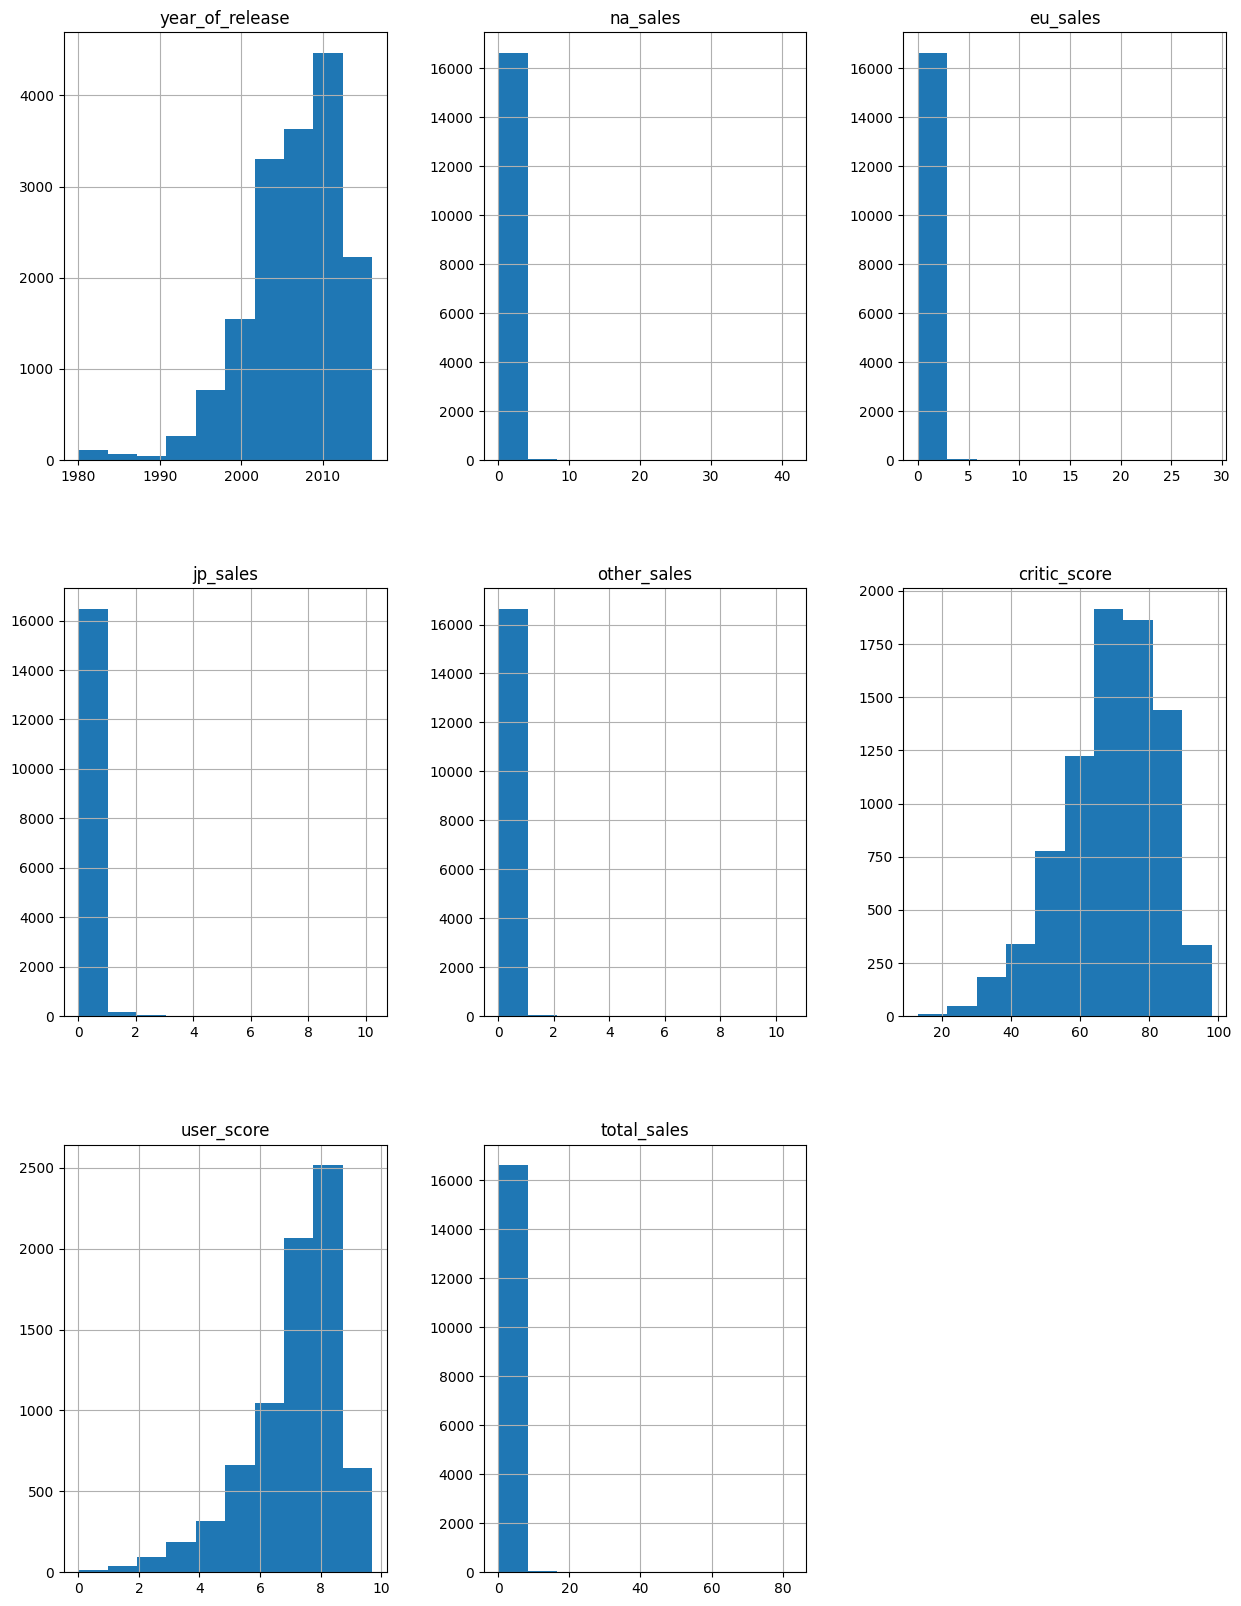

In [27]:
# After we sorted out the omissions and changed the types of values in the columns, 
# Let's build diagrams for all numeric columns of the table
games.hist(figsize=(15, 20));

### Conclusion: at the data preprocessing stage, we checked for gaps in the tables, changed the data types in the columns, studied the values in the user_score column in detail, checked the data for duplicates, added a column with total sales for all regions.
### We found a large number of omissions in the columns genre, critic_score, user_score, rating.
### Since we do not know the preferences of critics, users, it was decided to leave these omissions unchanged.
### No obvious duplicates were found
### Implicit duplicates were detected and corrected only in the rating column.

## We will conduct an exploratory analysis of the data

##### Let's analyze how many games were released in different years

In [28]:
# Let's see which years are presented in our table
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [29]:
# Let's make a summary table in which we will count the number of games for each year
games_by_year = games.pivot_table(index='year_of_release', values='name', aggfunc=['count']).reset_index()

In [30]:
games_by_year

,year_of_release,count
,,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15


**Obviously, very few games were released before 1994, so we will not take these years into account to build a schedule.**

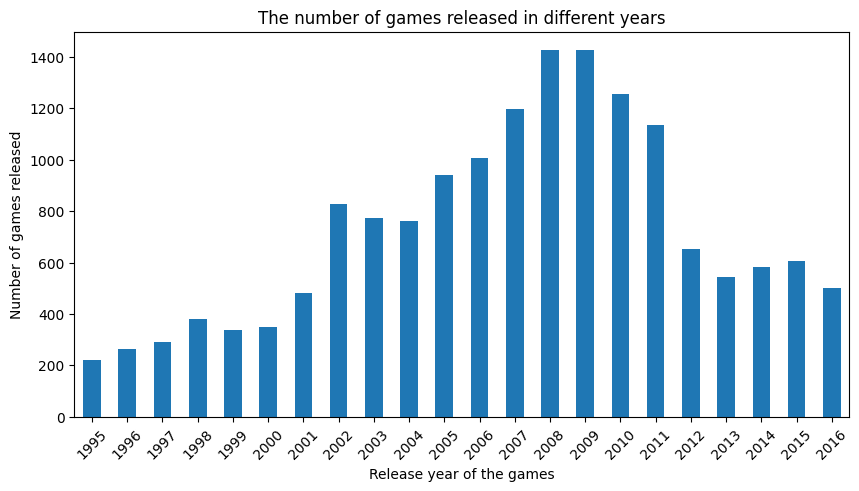

In [31]:
games[games['year_of_release'] > 1994].pivot_table(index='year_of_release', values='name', aggfunc=['count']).plot(
    grid=False, figsize=(10, 5), kind='bar', title='The number of games released in different years', rot=45, legend = None)
plt.xlabel("Release year of the games")
plt.ylabel("Number of games released")
plt.show()

In [32]:
games[games['year_of_release'] > 1994].pivot_table(index='year_of_release', values='name', aggfunc=['count'])

,count
,name
year_of_release,
1995,219
1996,263
1997,289
1998,379
1999,338
2000,350
2001,482
2002,829


**Conclusion: After 2001, there has been an increase in the number of games released, most games were released in 2008 - 2009, after 2011 there has been a sharp decrease in the number of games released.**

##### Let's analyze how sales have changed across platforms

In [33]:
# First, let's just estimate the distribution of data by platform and year
platforms_by_all_years = games.pivot_table(index='year_of_release', 
                                           columns='platform', values='total_sales', aggfunc=['sum']).reset_index()

In [34]:
platforms_by_all_years

year_of_release    sum                                           \
platform                   2600   3DO    3DS    DC      DS     GB    GBA   
0                   1980  11.38   NaN    NaN   NaN     NaN    NaN    NaN   
1                   1981  35.68   NaN    NaN   NaN     NaN    NaN    NaN   
2                   1982  28.88   NaN    NaN   NaN     NaN    NaN    NaN   
3                   1983   5.84   NaN    NaN   NaN     NaN    NaN    NaN   
4                   1984   0.27   NaN    NaN   NaN     NaN    NaN    NaN   
5                   1985   0.45   NaN    NaN   NaN    0.02    NaN    NaN   
6                   1986   0.67   NaN    NaN   NaN     NaN    NaN    NaN   
7                   1987   1.94   NaN    NaN   NaN     NaN    NaN    NaN   
8                   1988   0.74   NaN    NaN   NaN     NaN   1.43    NaN   
9                   1989   0.63   NaN    NaN   NaN     NaN  64.97    NaN   
10                  1990    NaN   NaN    NaN   NaN     NaN   4.89    NaN   
11                  1991    NaN   NaN    NaN   NaN     NaN   5.57    NaN   
12                  1992    NaN   NaN    NaN   NaN     NaN  25.49    NaN   
13                  1993    NaN   NaN    NaN   NaN     NaN    NaN    NaN   
14                  1994    NaN  0.02    NaN   NaN     NaN  12.18    NaN   
15                  1995    NaN  0.08    NaN   NaN     NaN   3.60    NaN   
16                  1996    NaN   NaN    NaN   NaN     NaN  36.03    NaN   
17                  1997    NaN   NaN    NaN   NaN     NaN   6.37    NaN   
18                  1998    NaN   NaN    NaN  3.38     NaN  26.90    NaN   
19                  1999    NaN   NaN    NaN  5.16     NaN  38.00    NaN   
20                  2000    NaN   NaN    NaN  5.99     NaN  19.76   0.07   
21                  2001    NaN   NaN    NaN  1.07     NaN   9.24  61.53   
22                  2002    NaN   NaN    NaN  0.29     NaN    NaN  74.16   
23                  2003    NaN   NaN    NaN   NaN     NaN    NaN  56.67   
24                  2004    NaN   NaN    NaN   NaN   17.27    NaN  77.91   
25                  2005    NaN   NaN    NaN   NaN  130.14    NaN  33.86   
26                  2006    NaN   NaN    NaN   NaN  119.81    NaN   5.28   
27                  2007    NaN   NaN    NaN  0.02  146.94    NaN   3.40   
28                  2008    NaN   NaN    NaN  0.04  145.31    NaN    NaN   
29                  2009    NaN   NaN    NaN   NaN  119.54    NaN    NaN   
30                  2010    NaN   NaN    NaN   NaN   85.02    NaN    NaN   
31                  2011    NaN   NaN  63.20   NaN   26.18    NaN    NaN   
32                  2012    NaN   NaN  51.36   NaN   11.01    NaN    NaN   
33                  2013    NaN   NaN  56.57   NaN    1.54    NaN    NaN   
34                  2014    NaN   NaN  43.76   NaN     NaN    NaN    NaN   
35                  2015    NaN   NaN  27.78   NaN     NaN    NaN    NaN   
36                  2016    NaN   NaN  15.14   NaN     NaN    NaN    NaN   

                                                                               \
platform     GC    GEN    GG    N64    NES    NG     PC  PCFX      PS     PS2   
0           NaN    NaN   NaN    NaN    NaN   NaN    NaN   NaN     NaN     NaN   
1           NaN    NaN   NaN    NaN    NaN   NaN    NaN   NaN     NaN     NaN   
2           NaN    NaN   NaN    NaN    NaN   NaN    NaN   NaN     NaN     NaN   
3           NaN    NaN   NaN    NaN  10.96   NaN    NaN   NaN     NaN     NaN   
4           NaN    NaN   NaN    NaN  50.08   NaN    NaN   NaN     NaN     NaN   
5           NaN    NaN   NaN    NaN  53.44   NaN   0.04   NaN     NaN     NaN   
6           NaN    NaN   NaN    NaN  36.41   NaN    NaN   NaN     NaN     NaN   
7           NaN    NaN   NaN    NaN  19.76   NaN    NaN   NaN     NaN     NaN   
8           NaN    NaN   NaN    NaN  45.01   NaN   0.03   NaN     NaN     NaN   
9           NaN    NaN   NaN    NaN   7.85   NaN    NaN   NaN     NaN     NaN   
10          NaN   2.60   NaN    NaN  15.73   NaN    NaN   NaN     NaN   

**Conclusion: the table is not the most informative, but it shows that platforms appear and disappear from 9 to 12 years.
That is, we can say that the typical "life of the platform" is on average 10.5 years.**

In [35]:
# We will find the platforms with the biggest sales
top_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc=['sum']).reset_index()

In [36]:
top_platforms.columns = ['platform', 'total_sales']

In [37]:
top_platforms.sort_values(by='total_sales', ascending=False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [38]:
# Find the total sales across all platforms
top_platforms['total_sales'].sum()

8913.289999999954

In [39]:
# Let's make a list of platforms-absolute leaders in sales (which together account for about 60% of all sales)
list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [40]:
# Let's create a table in which there will be only leading platforms
best_platforms = games.loc[games['platform'].isin(list)]

In [41]:
best_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [42]:
# Let's create a pivot table in which sales by year will be visible for each platform
best_platforms_by_year = best_platforms.pivot_table(index='year_of_release', 
                                                    columns='platform', values='total_sales', aggfunc=['sum']).reset_index()

In [43]:
best_platforms_by_year

year_of_release     sum                                        
platform                      DS      PS     PS2     PS3     Wii    X360
0                   1985    0.02     NaN     NaN     NaN     NaN     NaN
1                   1994     NaN    6.03     NaN     NaN     NaN     NaN
2                   1995     NaN   35.96     NaN     NaN     NaN     NaN
3                   1996     NaN   94.70     NaN     NaN     NaN     NaN
4                   1997     NaN  136.17     NaN     NaN     NaN     NaN
5                   1998     NaN  169.49     NaN     NaN     NaN     NaN
6                   1999     NaN  144.53     NaN     NaN     NaN     NaN
7                   2000     NaN   96.37   39.17     NaN     NaN     NaN
8                   2001     NaN   35.59  166.43     NaN     NaN     NaN
9                   2002     NaN    6.67  205.38     NaN     NaN     NaN
10                  2003     NaN    2.07  184.31     NaN     NaN     NaN
11                  2004   17.27     NaN  211.81     NaN     NaN     NaN
12                  2005  130.14     NaN  160.66     NaN     NaN    8.25
13                  2006  119.81     NaN  103.42   20.96  137.15   51.62
14                  2007  146.94     NaN   75.99   73.19  152.77   95.41
15                  2008  145.31     NaN   53.90  118.52  171.32  135.26
16                  2009  119.54     NaN   26.40  130.93  206.97  120.29
17                  2010   85.02     NaN    5.64  142.17  127.95  170.03
18                  2011   26.18     NaN    0.45  156.78   59.65  143.84
19                  2012   11.01     NaN     NaN  107.36   21.71   99.74
20                  2013    1.54     NaN     NaN  113.25    8.59   88.58
21                  2014     NaN     NaN     NaN   47.76    3.75   34.74
22                  2015     NaN     NaN     NaN   16.82    1.14   11.96
23                  2016     NaN     NaN     NaN    3.60    0.18    1.52

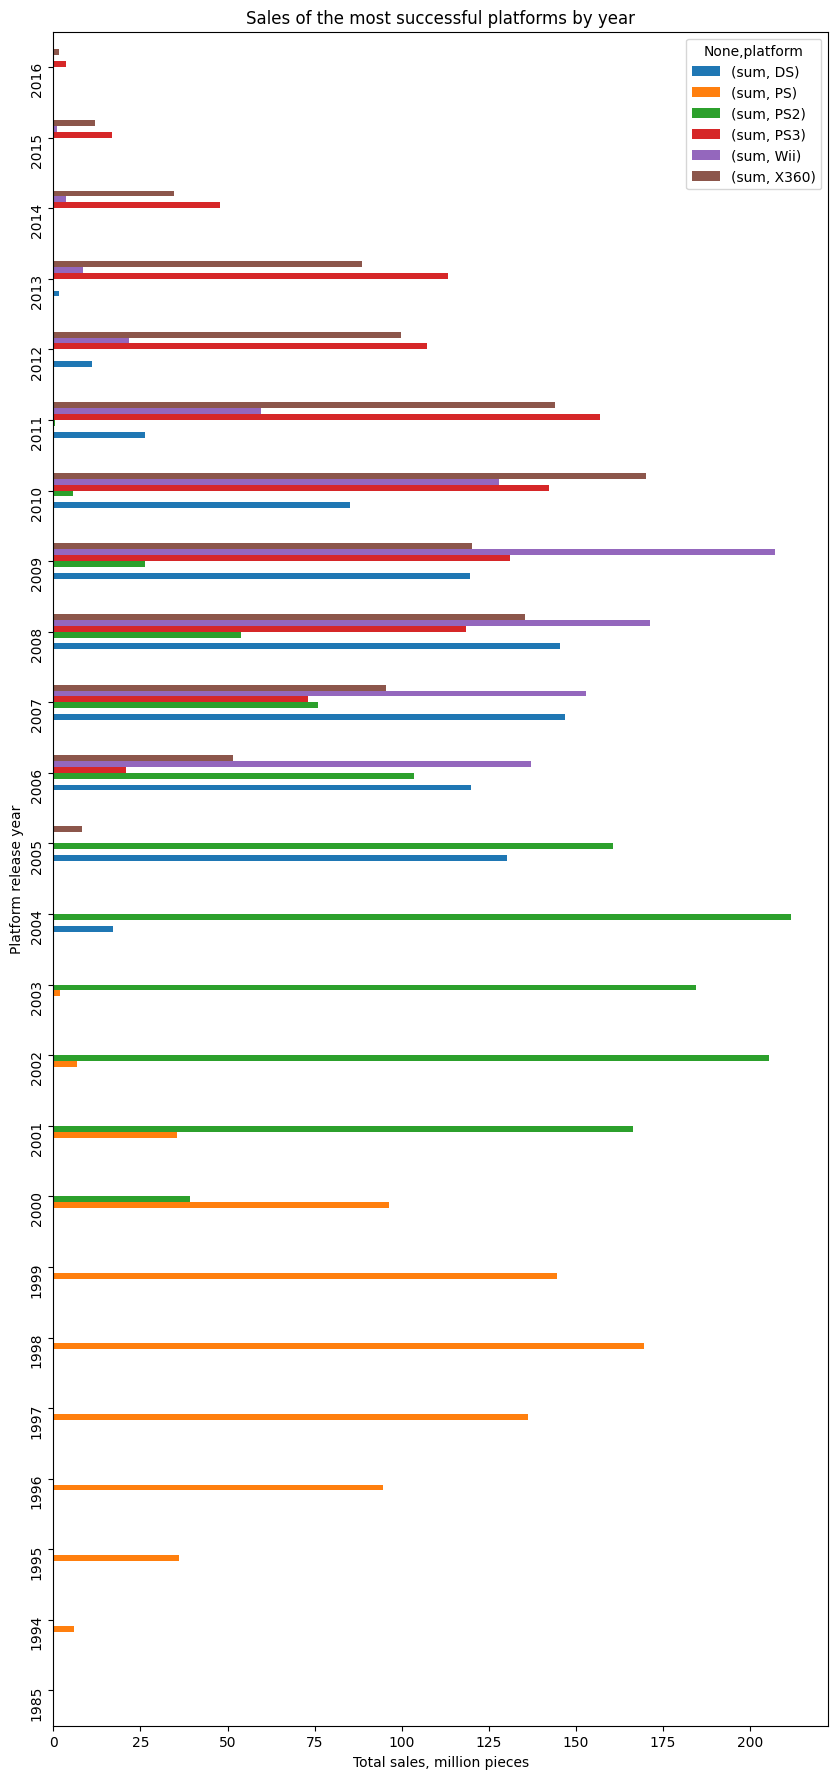

In [133]:
# Visualize the received data
best_platforms.pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='total_sales', aggfunc=['sum']).plot(grid=False, 
                                                                       figsize=(10, 22), 
                                                                        kind='barh', rot=90,
                                                                        title='Sales of the most successful platforms by year')
plt.xlabel("Total sales, million pieces")
plt.ylabel("Platform release year")
plt.show()

**Conclusion: the absolute leaders in sales for all time are the platforms: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
It was also possible to establish that platforms appear and disappear in about 10.5 years.**

##### We will determine the current data period, on the basis of which we will be able to build a forecast for 2017 in the future
Let's take the current period so that it includes 2 full years. Since the data for 2016 is incomplete, we will take data starting from 2014 inclusive.

In [45]:
# We leave the data only for the current period
games_new = games[games['year_of_release'] > 2013]

In [46]:
games_new['year_of_release'].unique()

<IntegerArray>
[2015, 2014, 2016]
Length: 3, dtype: Int64

In [47]:
# Let's check the proportion of omissions in the table with the current data
pd.DataFrame(round(games_new.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,57.490000
user_score,47.420000


##### We will determine which platforms are leading in sales, and we will also highlight the most potentially profitable platforms

In [48]:
# Let's create a pivot table in which sales by year will be visible for each platform
new_best_platforms_by_year = games_new.pivot_table(index='year_of_release', columns='platform', 
                                                   values='total_sales', aggfunc=['sum']).reset_index()

In [49]:
new_best_platforms_by_year

year_of_release    sum                                           \
platform                    3DS     PC    PS3     PS4   PSP    PSV   Wii   
0                   2014  43.76  13.28  47.76  100.00  0.24  11.90  3.75   
1                   2015  27.78   8.52  16.82  118.90  0.12   6.25  1.14   
2                   2016  15.14   5.25   3.60   69.25   NaN   4.25  0.18   

                               
platform   WiiU   X360   XOne  
0         22.03  34.74  54.07  
1         16.35  11.96  60.14  
2          4.60   1.52  26.15

In [134]:
new_best_platforms_by_year.columns =\
['year_of_release', '3DS_sales', 'PC_sales', 'PS3_sales', 'PS4_sales', 'PSP_sales', 'PSV_sales', 'Wii_sales', 'WiiU_sales', 'X360_sales', 'XOne_sales']

In [51]:
new_best_platforms_by_year

,year_of_release,3DS_sales,PC_sales,PS3_sales,PS4_sales,PSP_sales,PSV_sales,Wii_sales,WiiU_sales,X360_sales,XOne_sales
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


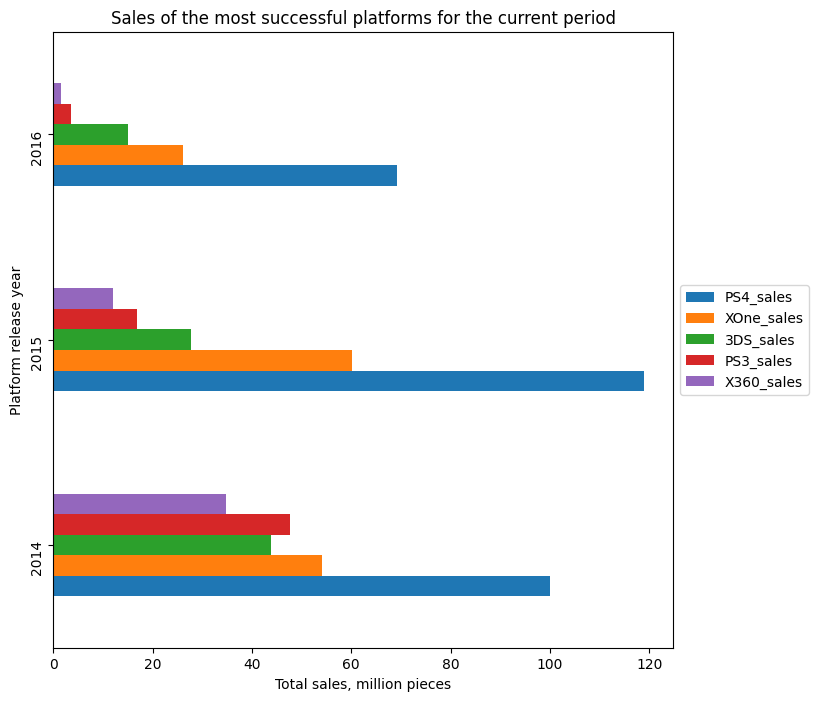

In [135]:
# We visualize the data obtained, we will leave only the top 5 platforms with the best sales on the chart
new_best_platforms_by_year[['year_of_release', 'PS4_sales', 'XOne_sales', '3DS_sales', 'PS3_sales', 'X360_sales']].\
plot(x='year_of_release', 
     grid=False, figsize=(8, 8), kind='barh', rot=90, title='Sales of the most successful platforms for the current period')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.xlabel("Total sales, million pieces")
plt.ylabel("Platform release year")
plt.show()

**Conclusion: the absolute leader in sales for the current period is the PS4 platform.
At the same time, sales of all platforms except XOne and PS4 are falling.
Accordingly, the XOne and PS4 platforms are the most potentially profitable platforms.**

##### Let's build Box plot chart for total sales depending on the platform

(0.0, 2.0)

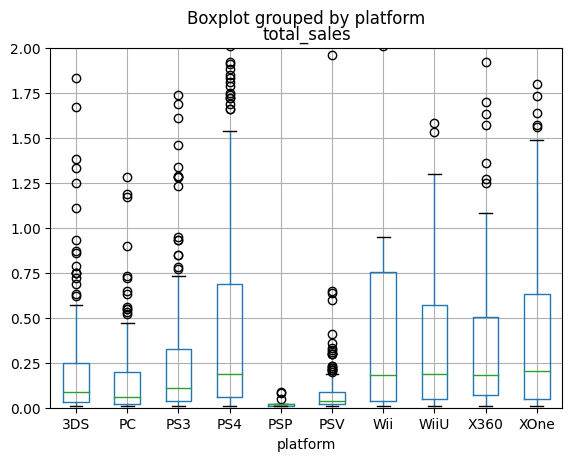

In [53]:
games_new.boxplot(column=['total_sales'], by='platform', grid= True) 
plt.ylim(0, 2)

**Conclusion: The charts show the largest scale of sales (excluding emissions) have the PS3, PS4, X360, XOne platforms.
The median sales value for these platforms is approximately 250,000 units. This, in my opinion, confirms the statement that it will be necessary to bet on the PS4, XOne platforms in 2017.
It is also clear that the 3DS, DS, PC, PS2, PSP, PSV platforms have a very low median sales value, which in my opinion suggests that there is no point betting on these platforms.**

##### For the PS3 platform, let's check how user reviews and critics affect sales

In [54]:
# Let's collect all the necessary columns that will be needed to build the scattering matrix into one variable
games_scatter = games_new[['platform', 'total_sales', 'user_score', 'critic_score']]

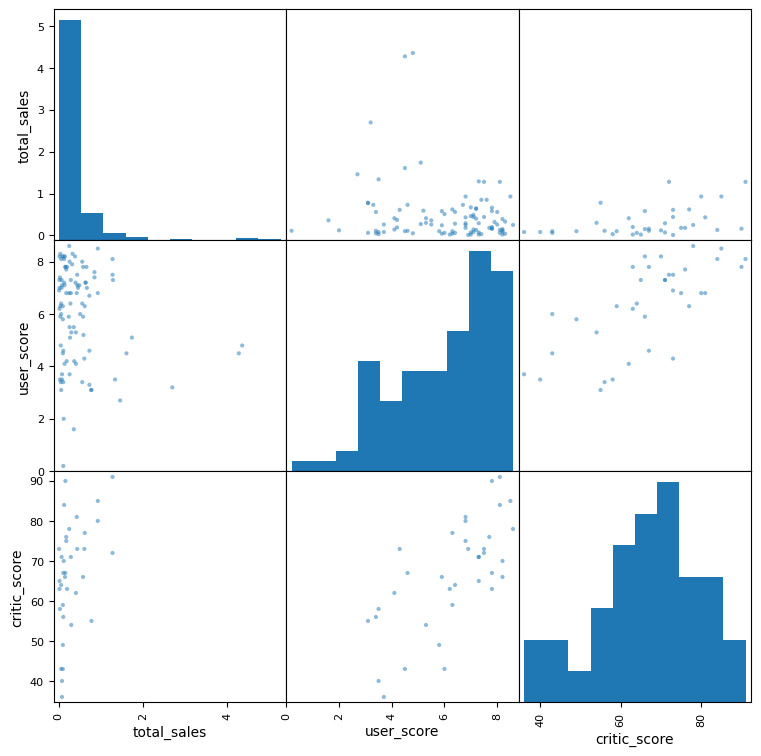

In [55]:
# Let's build a scattering matrix
pd.plotting.scatter_matrix(games_scatter[games_scatter['platform'] == 'PS3'], figsize=(9,9))
plt.show()

In [56]:
games_scatter.loc[games_scatter['platform'] == 'PS3', 'total_sales'].\
corr(games_scatter.loc[games_scatter['platform'] == 'PS3', 'user_score'])

-0.16676141347662116

In [57]:
games_scatter.loc[games_scatter['platform'] == 'PS3', 'total_sales'].\
corr(games_scatter.loc[games_scatter['platform'] == 'PS3', 'critic_score'])

0.4465746049319071

**Conclusion: when analyzing the PS3 platform, it was not possible to find a connection between sales and user evaluation, and it was also not possible to find a connection between sales and critics' evaluation.**

**It should also be noted that we have a large number of omissions in the columns with ratings. If there were fewer omissions, the output could be different.**

##### For the rest of the platforms, we will check how user reviews and critics affect sales
To do this, for each platform, we will calculate the correlation coefficient between sales and user evaluation and the correlation coefficient between sales and critic evaluation.

In [58]:
games_scatter['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [59]:
# Let's create a list with platform names
array = ['X360', 'DS', 'PS4', '3DS', 'Wii', 'XOne', 'WiiU', 'PC','PSP', 'PSV', 'PS2']

In [138]:
# We will calculate correlation coefficients for each platform
for i in array:
    correlation_1 = games_scatter.loc[games_scatter['platform'] == i, 'total_sales'].\
    corr(games_scatter.loc[games_scatter['platform'] == i, 'user_score'])
    
    correlation_2 = games_scatter.loc[games_scatter['platform'] == i, 'total_sales'].\
    corr(games_scatter.loc[games_scatter['platform'] == i, 'critic_score'])
    
    print(f'the {i} platform has a correlation coefficient between sales and user evaluation equal to {correlation_1}')
    print(f'the {i} platform has a correlation coefficient between sales and the critic rating equal to {correlation_2}')

the X360 platform has a correlation coefficient between sales and user evaluation equal to -0.138444570945665
the X360 platform has a correlation coefficient between sales and the critic rating equal to 0.5257228356581523
the DS platform has a correlation coefficient between sales and user evaluation equal to nan
the DS platform has a correlation coefficient between sales and the critic rating equal to nan
the PS4 platform has a correlation coefficient between sales and user evaluation equal to -0.0401315894726973
the PS4 platform has a correlation coefficient between sales and the critic rating equal to 0.402661410681041
the 3DS platform has a correlation coefficient between sales and user evaluation equal to 0.21519327185270273
the 3DS platform has a correlation coefficient between sales and the critic rating equal to 0.31411749286905105
the Wii platform has a correlation coefficient between sales and user evaluation equal to 1.0
the Wii platform has a correlation coefficient between

**Conclusion: when analyzing the other platforms, it was also not possible to find a connection between sales and user evaluation, and it was also not possible to find a connection between sales and critics' evaluation.**

**It should also be noted that we have a large number of omissions in the columns with ratings. If there were fewer omissions, the output could be different.**

##### Let's check which genres are the most profitable

In [61]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [62]:
games_by_genre = games_new.pivot_table(index='genre', values='total_sales', aggfunc=['median', 'count']).reset_index()

In [63]:
games_by_genre

,genre,median,count
,,total_sales,total_sales
0,Action,0.090,619
1,Adventure,0.030,185
2,Fighting,0.125,60
3,Misc,0.090,113
4,Platform,0.140,38
5,Puzzle,0.045,14
6,Racing,0.090,69
7,Role-Playing,0.110,221
8,Shooter,0.515,128


In [64]:
games_by_genre.columns = ['genre', 'median_sales', 'count']

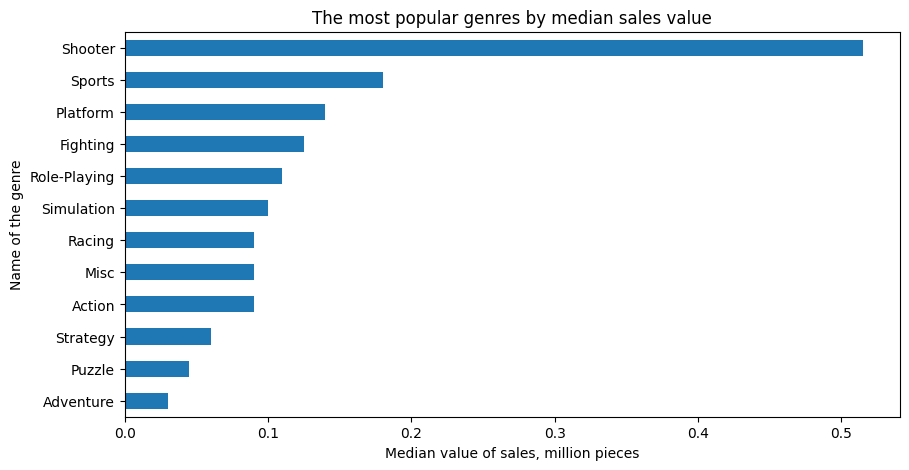

In [139]:
games_by_genre.sort_values(by='median_sales', ascending=True).\
plot(x='genre', y='median_sales', grid=False, figsize=(10, 5), kind='barh', rot=0, legend = None,
     title='The most popular genres by median sales value')
plt.xlabel("Median value of sales, million pieces")
plt.ylabel("Name of the genre")
plt.show()

**Conclusion: The graph shows that the most popular genre by a margin is Shooter, Sports is in second place, Adventure and Puzzle are the least popular.** 

### Conclusion on research analysis: at this stage of the project, we examined the data and determined the current data period, on the basis of which we will build a forecast for 2017.
### We were able to establish the following:
1. Most games were released in 2008 - 2009, after 2011 there was a sharp decrease in the number of released games.
2. Absolute leaders in sales for all time are the platforms: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
   It was also possible to establish that platforms appear and disappear in about 10.5 years.
3. For the current period, we have agreed to accept data from 2014 to 2016 inclusive.
4. XOne and PS4 platforms are the most potentially profitable platforms and leaders in sales for the current period. 
5. It was not possible to find a link between sales and user ratings, and it was also not possible to find a link between sales and critics' ratings.
   Separately, it should be noted that such a conclusion could be influenced by a large number of omissions in the columns with user ratings and critics. If there were fewer omissions, the output could be different.
6. The most popular genres are Shooter and Sports, the least popular are Adventure and Puzzle.

## Let's make a portrait of the user of each region (NA, EU, JP)

#### Let's determine the most popular platforms for each region

##### Let's determine the most popular platforms for North America

In [66]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [67]:
# Let's create a summary table by platforms and sales in North America
games_na = games_new.pivot_table(index='platform', values='na_sales', aggfunc=['sum'])

In [68]:
games_na

,sum
,na_sales
platform,
3DS,22.64
PC,7.23
PS3,22.05
PS4,98.61
PSP,0.00
PSV,2.52
Wii,2.08
WiiU,19.36


In [69]:
games_na.columns = ['na_sales']

In [70]:
# Let's add a column to the table with the share of each platform in total sales
games_na['sales_percentage'] = games_na['na_sales'] / (games_na['na_sales'].sum())

In [71]:
games_na

,na_sales,sales_percentage
platform,,
3DS,22.64,0.079701
PC,7.23,0.025452
PS3,22.05,0.077624
PS4,98.61,0.347145
PSP,0.00,0.000000
PSV,2.52,0.008871
Wii,2.08,0.007322
WiiU,19.36,0.068155
X360,28.30,0.099627


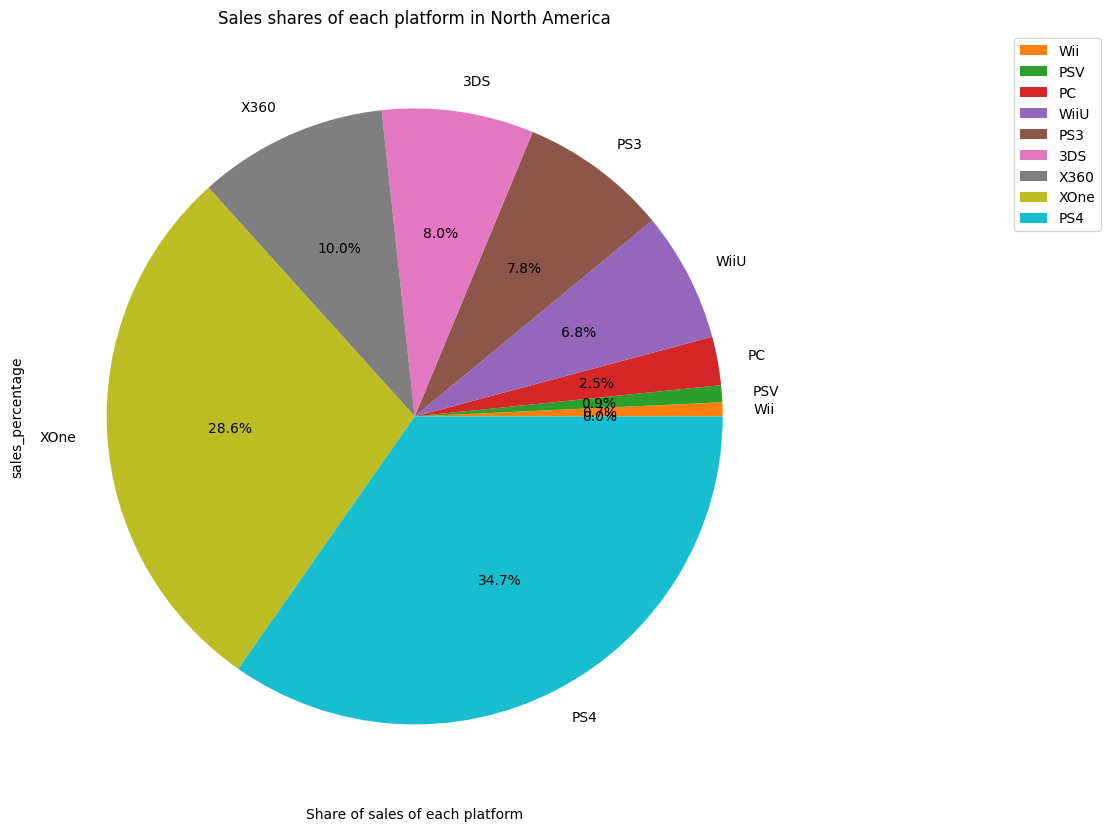

In [140]:
# Visualize the received data
games_na.sort_values(by='sales_percentage', ascending=True).\
plot(x='platform', y='sales_percentage', 
     grid=False, figsize=(20, 10), kind='pie', rot=0, autopct='%.1f%%', title='Sales shares of each platform in North America')
plt.xlabel("Share of sales of each platform")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

**Conclusion: The graph shows that the top 5 most popular platforms for the current period in North America include PS4, XOne, X360, 3DS, PS3.** 

##### Let's define the most popular platforms for Europe

In [73]:
# Let's create a summary table for platforms and sales in Europe
games_eu = games_new.pivot_table(index='platform', values='eu_sales', aggfunc=['sum'])

In [74]:
games_eu.columns = ['eu_sales']

In [75]:
# Let's add a column to the table with the share of each platform in total sales
games_eu['sales_percentage'] = games_eu['eu_sales'] / (games_eu['eu_sales'].sum())

In [76]:
games_eu

,eu_sales,sales_percentage
platform,,
3DS,16.12,0.059554
PC,17.97,0.066388
PS3,25.54,0.094355
PS4,130.04,0.480420
PSP,0.00,0.000000
PSV,3.53,0.013041
Wii,2.59,0.009568
WiiU,13.15,0.048581
X360,15.49,0.057226


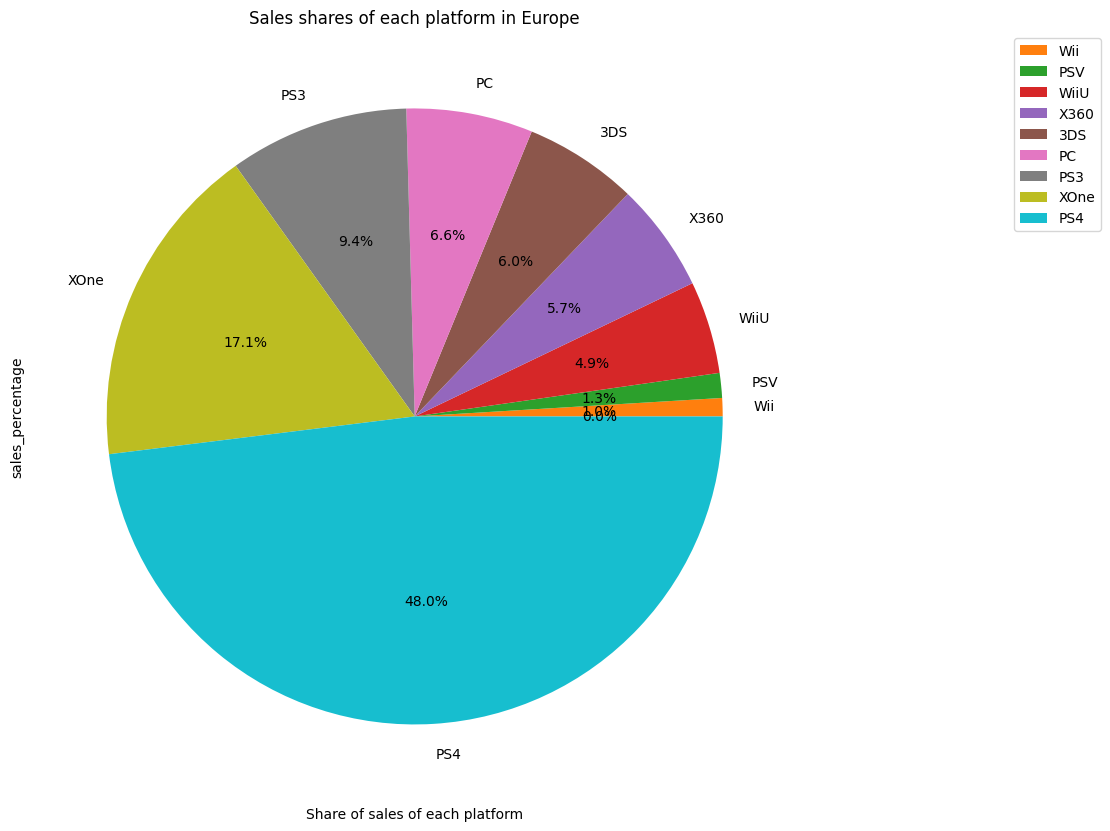

In [141]:
# Visualize the received data
games_eu.sort_values(by='sales_percentage', ascending=True).\
plot(x='platform', y='sales_percentage', 
     grid=False, figsize=(15, 10), kind='pie', rot=0, autopct='%.1f%%', title='Sales shares of each platform in Europe')
plt.xlabel("Share of sales of each platform")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

**Conclusion: The graph shows that the top 5 most popular platforms for the current period in Europe include PS4, XOne, PS3, PC, 3DS.**

##### Let's define the most popular platforms for Japan

In [78]:
# Let's create a summary table of platforms and sales in Japan
games_jp = games_new.pivot_table(index='platform', values='jp_sales', aggfunc=['sum']).reset_index()
games_jp

,platform,sum
,,jp_sales
0,3DS,44.24
1,PC,0.00
2,PS3,11.22
3,PS4,15.02
4,PSP,0.36
5,PSV,14.54
6,Wii,0.00
7,WiiU,7.31
8,X360,0.08


In [79]:
games_jp.columns = ['platform', 'jp_sales']

In [80]:
# Let's add a column to the table with the share of each platform in total sales
games_jp['sales_percentage'] = games_jp['jp_sales'] / (games_jp['jp_sales'].sum())

In [81]:
games_jp

,platform,jp_sales,sales_percentage
0,3DS,44.24,0.475239
1,PC,0.00,0.000000
2,PS3,11.22,0.120529
3,PS4,15.02,0.161349
4,PSP,0.36,0.003867
5,PSV,14.54,0.156193
6,Wii,0.00,0.000000
7,WiiU,7.31,0.078526
8,X360,0.08,0.000859
9,XOne,0.32,0.003438


In [82]:
games_jp.loc[ len(games_jp.index )] = ['other', 0, 0.008164]

In [83]:
games_jp = games_jp.query('sales_percentage > 0.008')

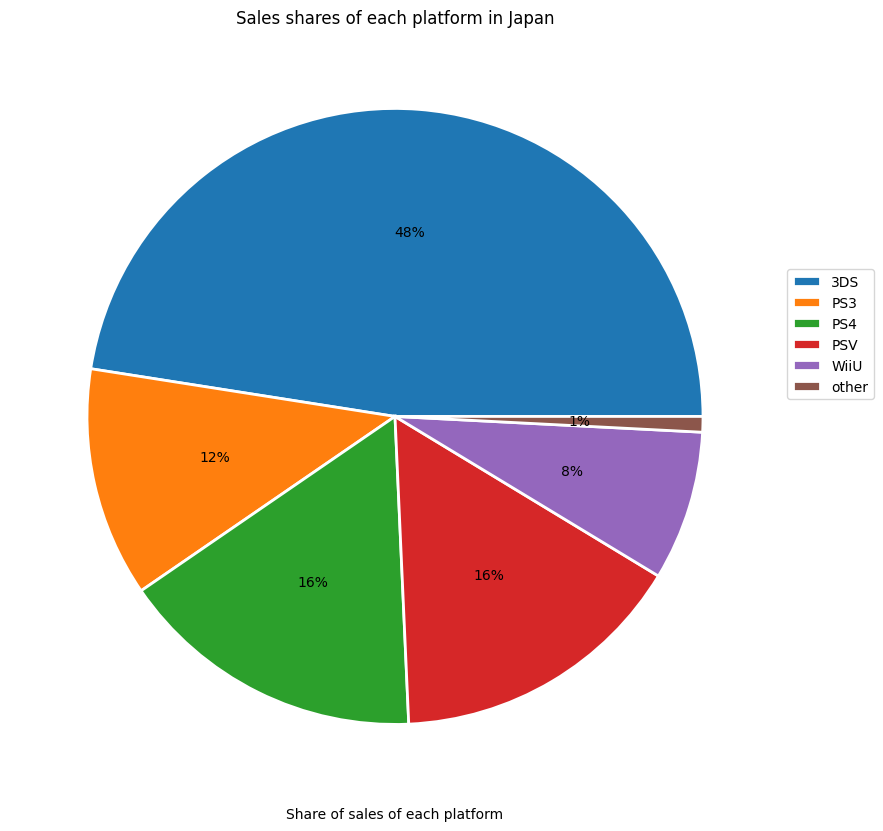

In [142]:
values= games_jp['sales_percentage']
keys = games_jp['platform']
fig, ax = plt.subplots(figsize=(20, 10))
plt.pie(values, 
        labels=keys, 
        labeldistance=None, 
        autopct='%.0f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.legend()
plt.legend(bbox_to_anchor=(1, 0.7))
plt.title('Sales shares of each platform in Japan')
plt.xlabel("Share of sales of each platform")
plt.show();

**Conclusion: The graph shows that the top 5 most popular platforms for the current period in Japan include 3DS, PS4, PSV, PS3, WiiU.**

#### Let's determine the most popular genres for each region

##### Let's define the most popular genres for North America

In [85]:
# Let's create a summary table by genre and sales in North America
genre_na = games_new.pivot_table(index='genre', values='na_sales', aggfunc=['sum']).reset_index()

In [86]:
genre_na

,genre,sum
,,na_sales
0,Action,72.53
1,Adventure,5.64
2,Fighting,12.43
3,Misc,15.05
4,Platform,6.79
5,Puzzle,0.65
6,Racing,8.74
7,Role-Playing,33.47
8,Shooter,79.02


In [87]:
genre_na.columns = ['genre', 'na_sales']

In [88]:
genre_na.sort_values(by='na_sales', ascending=False)

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05
2,Fighting,12.43
6,Racing,8.74
4,Platform,6.79
1,Adventure,5.64
9,Simulation,2.63


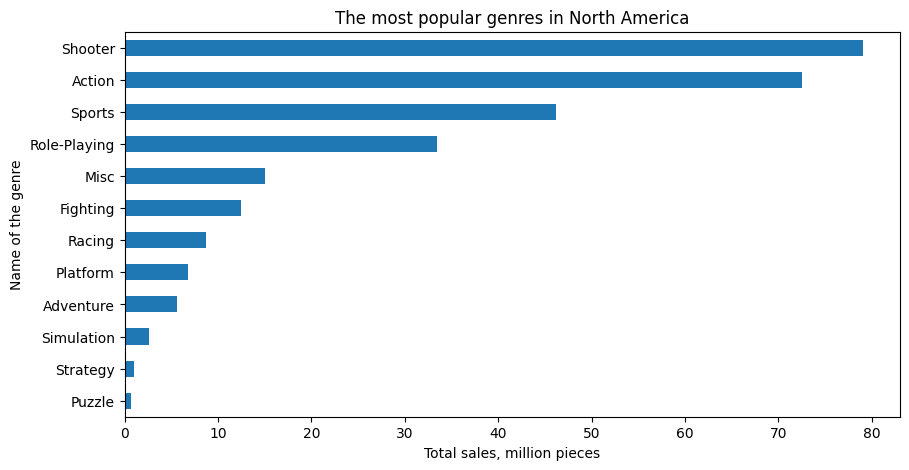

In [143]:
# Visualize the received data
genre_na.sort_values(by='na_sales', ascending=True).plot(x='genre', y='na_sales', 
                                                         grid=False, figsize=(10, 5), 
                                                         kind='barh', rot=0, legend = None, 
                                                         title='The most popular genres in North America')
plt.xlabel("Total sales, million pieces")
plt.ylabel("Name of the genre")
plt.show()

**Conclusion: The graph shows that the top 5 most popular genres for the current period in North America include Action, Shooter, Sports. Misc, Role-Playing.**

##### Let's define the most popular genres for Europe

In [90]:
# Let's create a summary table by genre and sales in Europe
genre_eu = games_new.pivot_table(index='genre', values='eu_sales', aggfunc=['sum']).reset_index()

In [91]:
genre_eu.columns = ['genre', 'eu_sales']

In [92]:
genre_eu.sort_values(by='eu_sales', ascending=False)

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13
3,Misc,12.86
9,Simulation,7.30
4,Platform,6.80
2,Fighting,6.69
1,Adventure,6.49


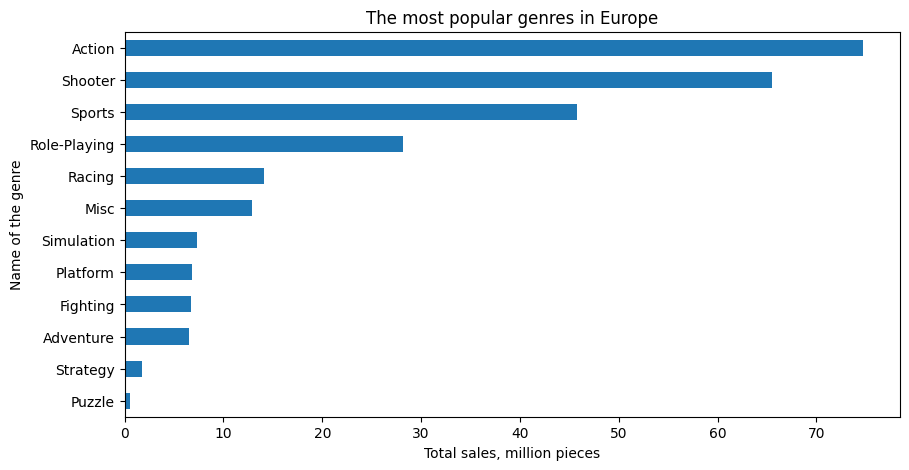

In [144]:
# Visualize the received data
genre_eu.sort_values(by='eu_sales', ascending=True).plot(x='genre', y='eu_sales', 
                                                         grid=False, figsize=(10, 5), 
                                                         kind='barh', rot=0, legend = None, 
                                                         title='The most popular genres in Europe')
plt.xlabel("Total sales, million pieces")
plt.ylabel("Name of the genre")
plt.show()

**Conclusion: The graph shows that the top 5 most popular genres for the current period in Europe include Action, Shooter, Sports, Role-Playing, Racing.**

##### Let's define the most popular genres for Japan

In [94]:
# Let's create a summary table by genre and sales in Japan
genre_jp = games_new.pivot_table(index='genre', values='jp_sales', aggfunc=['sum']).reset_index()

In [95]:
genre_jp.columns = ['genre', 'jp_sales']

In [96]:
genre_jp.sort_values(by='jp_sales', ascending=False)

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87
1,Adventure,3.60
10,Sports,3.26
4,Platform,2.69
9,Simulation,2.31
6,Racing,1.76


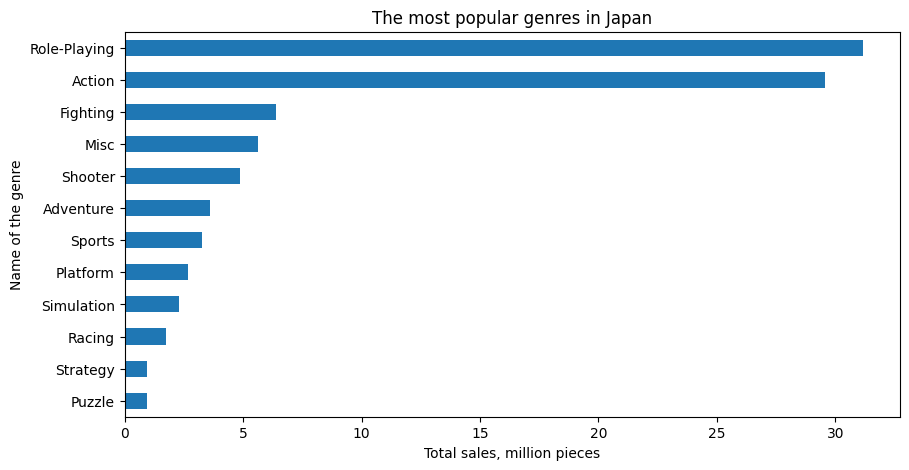

In [145]:
# Visualize the received data
genre_jp.sort_values(by='jp_sales', ascending=True).plot(x='genre', y='jp_sales', 
                                                         grid=False, figsize=(10, 5), 
                                                         kind='barh', rot=0, legend = None, 
                                                         title='The most popular genres in Japan')
plt.xlabel("Total sales, million pieces")
plt.ylabel("Name of the genre")
plt.show()

**Conclusion: The graph shows that the top 5 most popular genres for the current period in Japan include Role-Playing, Action, Fighting, Misc, Shooter.**

In [98]:
# For convenience, we will reduce all the data to one graph
all_regions = games_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum'])

In [99]:
all_regions

sum                  
             eu_sales jp_sales na_sales
genre                                  
Action          74.68    29.58    72.53
Adventure        6.49     3.60     5.64
Fighting         6.69     6.37    12.43
Misc            12.86     5.61    15.05
Platform         6.80     2.69     6.79
Puzzle           0.52     0.93     0.65
Racing          14.13     1.76     8.74
Role-Playing    28.17    31.16    33.47
Shooter         65.52     4.87    79.02
Simulation       7.30     2.31     2.63
Sports          45.73     3.26    46.13
Strategy         1.79     0.95     0.98

In [100]:
all_regions.columns=['eu_sales', 'jp_sales', 'na_sales']

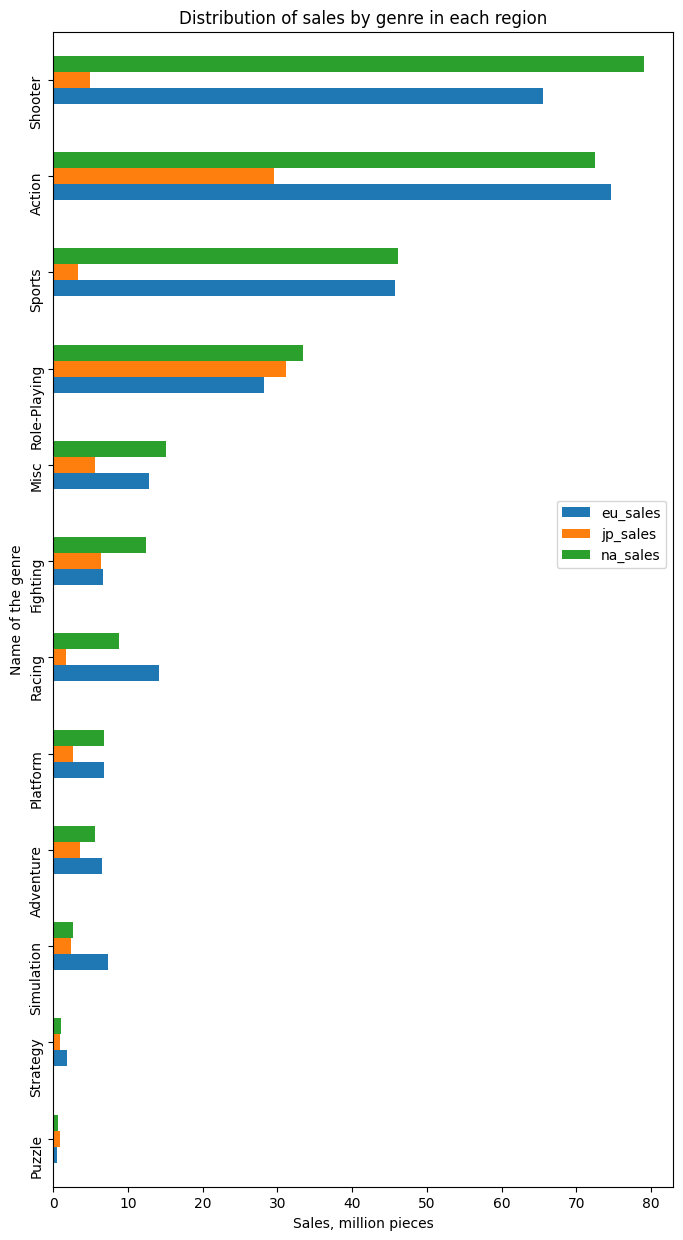

In [146]:
all_regions.sort_values(by='na_sales', ascending=True).plot(grid=False, figsize=(8, 15), 
                                                            kind='barh', rot=90, 
                                                            title='Distribution of sales by genre in each region')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.xlabel("Sales, million pieces")
plt.ylabel("Name of the genre")
plt.show()

**Conclusion: the graph shows that users from North America and Europe prefer the same genres, while users from Japan prefer others.**
**The chart also shows that sales in Europe and North America significantly exceed sales in Japan.**

#### Let's check whether the ESRB rating affects sales in a particular region

##### Let's check if the ESRB rating affects sales in North America

In [102]:
# Let's create a summary table with the ESRB rating and average sales
esrb_na = games_new.pivot_table(index='rating', values='na_sales', aggfunc=['mean', 'count']).reset_index()

In [103]:
esrb_na

,rating,mean,count
,,na_sales,na_sales
0,E,0.231689,219
1,E10+,0.179622,185
2,M,0.363849,265
3,T,0.143727,271


In [104]:
esrb_na.columns = ['rating', 'mean_na_sales', 'count']

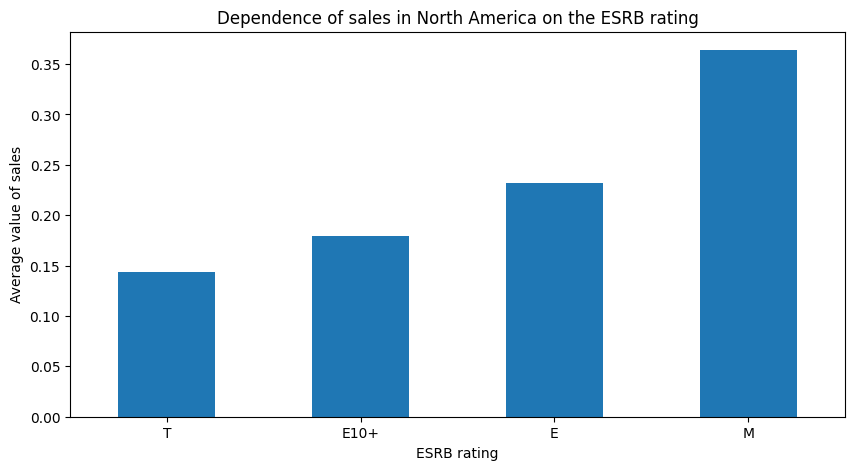

In [147]:
# Visualize the received data
esrb_na.sort_values(by='mean_na_sales', ascending=True).plot(x='rating', y='mean_na_sales', 
                                                             grid=False, figsize=(10, 5), 
                                                             kind='bar', rot=0, legend = None, 
                                                             title='Dependence of sales in North America on the ESRB rating')
plt.xlabel("ESRB rating")
plt.ylabel("Average value of sales")
plt.show()

**Conclusion: The ESRB rating has an impact on sales in North America.**
**Category M is the most popular (which is logical), categories E, E10+, T are significantly behind in popularity.**
**At the same time, it is impossible to draw a conclusion for the EC and RP rating categories, since they are practically not represented in the sample.**

**It should also be noted that we have a large number of omissions in columns with an ESRB rating. If there were fewer omissions, the output could be different.**

##### Let's check whether the ESRB rating affects sales in Europe

In [106]:
# Let's create a summary table with the ESRB rating and average sales
esrb_eu = games_new.pivot_table(index='rating', values='eu_sales', aggfunc=['mean', 'count']).reset_index()

In [107]:
esrb_eu.columns = ['rating', 'mean_eu_sales', 'count']

In [108]:
esrb_eu

,rating,mean_eu_sales,count
0,E,0.265114,219
1,E10+,0.141405,185
2,M,0.352604,265
3,T,0.125720,271


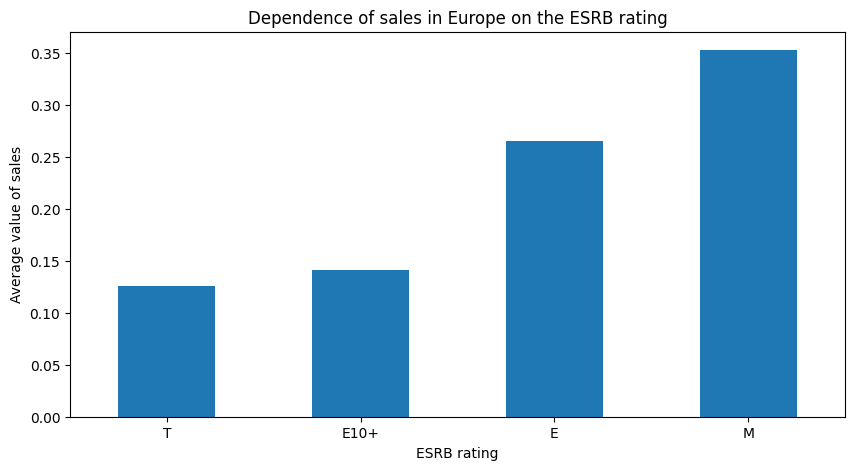

In [149]:
# Visualize the received data
esrb_eu.sort_values(by='mean_eu_sales', ascending=True).plot(x='rating', y='mean_eu_sales', 
                                                             grid=False, figsize=(10, 5), 
                                                             kind='bar', rot=0, legend = None, 
                                                             title='Dependence of sales in Europe on the ESRB rating')
plt.xlabel("ESRB rating")
plt.ylabel("Average value of sales")
plt.show()

**Conclusion: The ESRB rating has an impact on sales in Europe.**
**Category M is the most popular (which is logical), categories E, E 10+, T are significantly behind in popularity.**
**At the same time, it is impossible to draw a conclusion for the US and RP rating categories, since they are practically not represented in the sample.**

**It should also be noted that we have a large number of omissions in columns with an ESRB rating. If there were fewer omissions, the output could be different.**

##### Let's check whether the ESRB rating affects sales in Japan

In [110]:
# Let's create a summary table with the ESRB rating and average sales
esrb_jp = games_new.pivot_table(index='rating', values='jp_sales', aggfunc=['mean', 'count']).reset_index()

In [111]:
esrb_jp.columns = ['rating', 'mean_jp_sales', 'count']

In [112]:
esrb_jp

,rating,mean_jp_sales,count
0,E,0.040822,219
1,E10+,0.024108,185
2,M,0.030226,265
3,T,0.054539,271


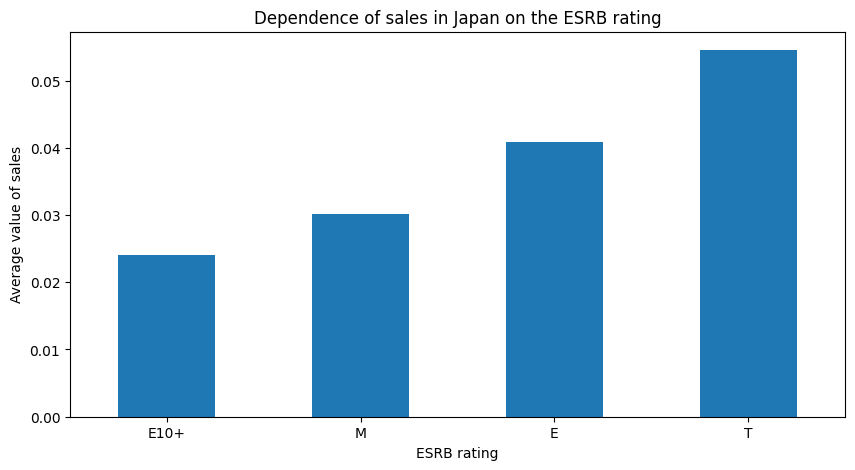

In [150]:
# Visualize the received data
esrb_jp.sort_values(by='mean_jp_sales', ascending=True).plot(x='rating', y='mean_jp_sales', 
                                                             grid=False, figsize=(10, 5), kind='bar', rot=0,
                                                             legend = None, 
                                                             title='Dependence of sales in Japan on the ESRB rating')
plt.xlabel("ESRB rating")
plt.ylabel("Average value of sales")
plt.show()

**Conclusion: The ESRB rating has an impact on sales in Japan.**
**These categories are the most popular (which is logical), the E10+ category is significantly behind in popularity.**
**The category is quite popular, but inferior to the leaders.**
**At the same time, it is impossible to draw a conclusion for the US and RP rating categories, since they are practically not represented in the sample.**

**It should also be noted that we have a large number of omissions in columns with an ESRB rating. If there were fewer omissions, the output could be different.**

### Conclusion based on user portraits: at this stage of the project, we tried to determine the preferences of users from each region.
### We were able to establish the following:
1. Users from North America and Europe generally prefer the same platforms, while the preferences of users from Japan are quite different. However, it should be noted that the PS4 platform is popular in all regions.
   The most popular platforms for users from North America and Europe are PS4 and XOne, from Japan - 3DS and PS4.
2. Users from North America and Europe prefer the same genres, while users from Japan prefer others.
   The most popular genres among users from North America and Europe are Action, Shooter, Sports, from Japan - Role-Playing, Action, Fighting.
   At the same time, it should be noted that the Action genre is popular in all regions.
3. The ESRB rating has an impact on sales in each region. M-rated games are the most popular in North America and Europe, and T-rated games are the most popular in Japan.
   The evaluation of this parameter was influenced by a large number of omissions in the column with the ESRB rating. If there were fewer omissions, the output could be different.
4. Sales of games in North America and Europe significantly exceed sales of games in Japan.

 ## Hypothesis testing

##### Let's test the hypothesis about the equality of the average user ratings of the Xbox One and PC platforms

In [114]:
# First, let's remember what values are in the user_score column
games_new['user_score'].unique()

array([nan, 8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4,
       8.5, 4.8, 4.9, 4.5, 6.2, 8.4, 6.3, 7.7, 9.2, 7.6, 8.7, 6.7, 7. ,
       4.1, 8.2, 6.8, 5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 4.2, 3.2, 8.6,
       3.1, 9. , 7.3, 7.4, 6. , 4.7, 7.1, 8.8, 5.1, 6.6, 3. , 5.8, 2.9,
       8.9, 2.7, 8. , 3.5, 7.8, 5.2, 5.6, 4.6, 3.3, 9.3, 4. , 3.6, 3.7,
       2.4, 2.8, 5.3, 1.7, 1.6, 3.8, 1.5, 0.7, 2.5, 2. , 2.1, 0.2, 1.9,
       1.4, 2.3])

**Since the nan values will prevent us from calculating the p-value, we need to get rid of them.**

In [115]:
games_2 = games_new.dropna(subset=['user_score'])

In [116]:
games_2['user_score'].unique()

array([8.3, 4.3, 5.7, 5. , 6.5, 9.1, 6.1, 7.9, 5.4, 8.1, 6.4, 3.4, 8.5,
       4.8, 4.9, 4.5, 6.2, 8.4, 6.3, 7.7, 9.2, 7.6, 8.7, 6.7, 7. , 4.1,
       8.2, 6.8, 5.5, 7.5, 4.4, 5.9, 7.2, 6.9, 3.9, 4.2, 3.2, 8.6, 3.1,
       9. , 7.3, 7.4, 6. , 4.7, 7.1, 8.8, 5.1, 6.6, 3. , 5.8, 2.9, 8.9,
       2.7, 8. , 3.5, 7.8, 5.2, 5.6, 4.6, 3.3, 9.3, 4. , 3.6, 3.7, 2.4,
       2.8, 5.3, 1.7, 1.6, 3.8, 1.5, 0.7, 2.5, 2. , 2.1, 0.2, 1.9, 1.4,
       2.3])

In [117]:
# Let's collect the values of the user_score column for the XOne platform into a separate variable
sample_1 = games_2.loc[games_2['platform'] == 'XOne', 'user_score']

In [118]:
# Let's collect the values of the user_score column for the PC platform into a separate variable
sample_2 = games_2.loc[games_2['platform'] == 'PC', 'user_score']

In [119]:
# Let's calculate the sample sizes
len(sample_2)

122

In [120]:
len(sample_1)

165

**We will use the hypothesis of the equality of the averages of the two general aggregates, since the user ratings of the platforms do not depend on each other.
The average values of the user ratings of the Xbox One and PC platforms will be taken as two general aggregates.
We form a null hypothesis: The average values of the user ratings of the XboxOne and PC platforms are equal.
Alternative hypothesis: The average values of user ratings of XboxOne and PC platforms are not equal.
Also, for verification, we will calculate the actual average values of the user ratings of the XboxOne and PC platforms.**

**We need to test the hypothesis about the equality of the mean values in two samples, so to test the hypothesis we will use the Student's criterion (t-test for independent samples). Both samples are quite large in size (more than 30), respectively, there are no restrictions for using this criterion.
We will set the significance level equal to 0.05.
Since the general aggregates are not equal in size and we cannot be 100% sure that they have the same variances, we will assign the value False to the equal_var parameter.**

In [151]:
# Let's calculate the p-value
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-value: 0.11601398086668835
It was not possible to reject the null hypothesis


In [122]:
# For verification, we will calculate the actual average values of user ratings
sample_1.mean()

6.594545454545456

In [123]:
sample_2.mean()

6.298360655737705

**Conclusion: it was not possible to reject the null hypothesis, so the average values of the user ratings of the Xbox One and PC platforms are equal.**
**This conclusion is also confirmed by comparing the actual values of the average user ratings - the difference is 4.70%.**

##### Let's test the hypothesis about the equality of the average user ratings of the Action and Sports genres

In [124]:
# Let's collect the values of the user_score column for the Action genre into a separate variable
sample_3 = games_2.loc[games_2['genre'] == 'Action', 'user_score']

In [125]:
sample_3.unique()

array([8.3, 7.9, 8.1, 6.3, 4.9, 7.6, 4.1, 8.2, 6.8, 8.6, 9. , 6.5, 5.1,
       7.3, 4.5, 5.8, 6.6, 8. , 6.1, 7.8, 7.5, 7.2, 6.2, 5. , 8.4, 8.7,
       7.1, 7. , 6.4, 7.4, 6.7, 5.4, 7.7, 4.6, 5.9, 3.4, 3. , 6.9, 3.7,
       5.6, 4.7, 4.2, 5.7, 3.6, 3.3, 4.3, 5.5, 8.5, 3.2, 8.8, 4.8, 2.5,
       5.3, 6. , 3.5, 3.8, 5.2, 2.4, 2. , 2.8, 3.1, 2.3])

In [126]:
# Let's collect the values of the user_score column for the Sports genre into a separate variable
sample_4 = games_2.loc[games_2['genre'] == 'Sports', 'user_score']

In [127]:
sample_4.unique()

array([4.3, 5. , 5.7, 4.5, 6.7, 4.4, 5.9, 4.2, 3.2, 5.5, 7. , 6.1, 6.2,
       5.4, 4.9, 6.3, 3. , 2.9, 6.4, 2.7, 3.5, 7.4, 5.1, 7.8, 7.1, 3.1,
       7.2, 4.6, 3.3, 7.7, 4. , 6.9, 3.6, 6. , 8.2, 2.4, 2.8, 7.6, 5.3,
       6.8, 1.7, 8.7, 1.6, 5.8, 6.6, 8.3, 5.6, 1.5, 0.7, 3.8, 7.3, 4.1,
       2. , 2.1, 3.4, 0.2, 1.9, 6.5, 4.8, 8. , 3.7, 8.8, 1.4])

In [128]:
# Let's calculate the sample sizes
len(sample_3)

297

In [129]:
len(sample_4)

127

**We will use the hypothesis of the equality of the averages of the two general aggregates, since the user ratings of genres do not depend on each other.**
**The average values of the user ratings of the Action and Sports genres will be taken as two general aggregates.**
**We form a null hypothesis: The average values of the user ratings of the Action and Sports genres are equal.**
**Alternative hypothesis: The average values of the user ratings of the Action and Sports genres are not equal.**
**Also, for verification, we will calculate the actual average values of the user ratings of the Action and Sports genres.**

**We need to test the hypothesis about the equality of the mean values in two samples, so to test the hypothesis we will use the Student's criterion (t-test for independent samples). Both samples are quite large in size (more than 30), respectively, there are no restrictions for using this criterion.
We will set the significance level equal to 0.05.
Since the general aggregates are not equal in size and we cannot be 100% sure that they have the same variances, we will assign the value False to the equal_var parameter.**

In [152]:
# Посчитаем p-value
alpha = 0.05
results = st.ttest_ind(sample_3, sample_4, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('It was not possible to reject the null hypothesis')

p-value: 1.1825550382644557e-14
We reject the null hypothesis


In [131]:
# For verification, we will calculate the actual average values of user ratings
sample_3.mean()

6.760606060606061

In [132]:
sample_4.mean()

5.2251968503937

**Conclusion: since the p-value turned out to be less than the significance level, it can be concluded that the average values of the user ratings of the Action and Sports genres are not equal.**
**This conclusion is also confirmed by comparing the actual values of the average user ratings - the difference is 29.38%.**

### Hypothesis testing conclusion: In this section of the project, we tested two hypotheses.
### We were able to establish the following:
1. The average values of the user ratings of the Xbox One and PC platforms are equal.
2. The average values of user ratings of the Action and Sports genres are not equal.
3. The above conclusions were influenced by a large number of omissions in the column with user ratings. If there were fewer omissions, the conclusions could be different.

## General conclusion on the project
In this project, we analyzed data from the online store "Streamchik", which sells computer games all over the world. We examined the data and tested some hypotheses that will help you bet on a potentially popular product and plan advertising campaigns.

The project is divided into several parts: in the first part we studied the general information about the data presented.

In the second part, we preprocessed the data, checked for gaps, changed the data type in some columns, checked for explicit and implicit duplicates.
We managed to establish the following: The largest number of omissions in the columns critic_score, user_score, rating.
Since we do not know the criteria for evaluating critics, users, and the ESRB association, it was decided to leave gaps in these columns.
The omissions may have appeared due to the fact that some of the data refers to 2016 and not all the data about the games could have been published at that time (for example, critic_score, user_score, rating).
A similar situation may be with old games - when they came out, no one collected or stored information on them.
No explicit duplicates were detected, implicit duplicates were detected and corrected only in the rating column.

In the third part, we were engaged in research data analysis.
We were able to establish the following:
1. Most games were released in 2008 - 2009, after 2011 there was a sharp decrease in the number of released games.
2. Absolute leaders in sales for all time are the platforms: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.
   It was also possible to establish that platforms appear and disappear in about 10.5 years.
3. For the current period, we have agreed to accept data from 2014 to 2016 inclusive.
4. The absolute leader in sales for the current period is the PS4 platform.
   XOne and PS4 platforms are the most potentially profitable platforms. 
5. It was not possible to find a link between sales and user ratings, and it was also not possible to find a link between sales and critics' ratings.
   Separately, it should be noted that such a conclusion could be influenced by a large number of omissions in the columns with user ratings and critics. If there were fewer omissions, the output could be different.
6. The most popular genre is Shooter, Sports is in second place, Adventure and Puzzle are the least popular.

In the fourth part, we created a portrait of the user of each region.
We were able to establish the following:
1. Users from North America and Europe generally prefer the same platforms, while the preferences of users from Japan are quite different.
   The most popular platforms for users from North America and Europe are PS4 and XOne, from Japan - 3DS and PS4.
   The PS4 platform is popular in all regions.
2. Users from North America and Europe prefer the same genres, while users from Japan prefer others.
   The most popular genres among users from North America and Europe are Action, Shooter, Sports, from Japan - Role-Playing, Action, Fighting.
   The Action genre is popular in all regions.
3. The ESRB rating has an impact on sales in each region. M-rated games are the most popular in North America and Europe, and T-rated games are the most popular in Japan.
   The evaluation of this parameter was influenced by a large number of omissions in the column with the ESRB rating. If there were fewer omissions, the output could be different.
4. Sales of games in North America and Europe significantly exceed sales of games in Japan.
   
In the fifth part, we tested two hypotheses.
We were able to establish the following:
1. The average values of the user ratings of the XboxOne and PC platforms are equal.
2. The average values of user ratings of the Action and Sports genres are not equal.
3. The above conclusions were influenced by a large number of omissions in the column with user ratings. If there were fewer omissions, the conclusions could be different.

Recommendations that can be given to colleagues when planning work for 2017:
1. The company's offer must necessarily include the XOne and PS4 platforms, special attention should be paid to the PS4 platform, since it is popular in all regions.
2. Advertising activities for North America, Europe and Japan should be different - Japanese users have different preferences for platforms and genres.
3. When planning activities for 2017, priority should be given to users from North America and Europe, since game sales are higher in these regions. 
4. The novelties of the Action and Shooter genres should be given the most attention, since these genres are most popular in North America and Europe.
5. If updated data on user ratings, critics, and the ESRB association rating appear, it is possible that the above conclusions will change.